# Data Analysis Final Report

Jethro R. Lee

## Executive Summary


My motivation for this project was trying to understand the thought process behind composer Frédéric François Chopin in his music-making career. Using [clustering](#Clustering) and [dimensionality reduction](#PCA), I realized that the labels that Chopin uses for some of his works (e.g. piano sonata, etude, mazurka) do not necessarily indicate any similarity across them: many mazurkas, for instance, were separated into different clusters by the machine, so each mazurka is probably noticeably distinct from each other. Furthermore, I made a [classifier](#Random-Forest-Classifier) to determine how easy it is to predict the opus number of a Chopin composition based on a set of the works' features. The classifier was able to predict the opus number of a piece with approximately 65% accuracy, but closer inspection of the classifier reveals that 1) the classifier had a relatively high accuracy score due to its strong ability to **not incorrectly** classify a piece's opus number and 2) the feature that helps the classifier to best predict a song's opus number is the year(s) it was published. Hence, the classifier reveals that the works included in a Chopin opus are very unique from each other. This outcome suggests that Chopin's method of composing is probabiliy dissimilar to the "era" approach that many artists today seemed to have adopted (i.e. releasing songs with the same mood in an album at a specific point in time).

## Introduction


I wanted to pursue this fun project over the winter break of my sophomore year since I adore classical music so much and want to determine what makes it so appealing. I decided that the best way to start answering this question is by seeing if there exists any common trends among esteemed classical composers. A dataset from Kaggle featuring a set of Chopin works along with their characteristics piqued my interest and inspired that decision. Investigating the approaches that composers such as Chopin employ in their artistic careers can help me inspire others to let the joy of classical music brighten their hearts. In a world where appreciation for classical music is dying, I am a strong advocate for keeping the spirit of classical music alive forever since I believe it is infused with a level of compassion and storytelling that cannot be emulated through our increasingly technological music production techniques.

When contemplating which aspect of Chopin's career I wanted to analyze, my mind flashed toward the amount of [success](https://www.yahoo.com/entertainment/taylor-swift-broke-73-records-010133153.html) that Taylor Swift has achieved recently with the release of her new album, ["Midnights."](https://music.apple.com/us/album/midnights-3am-edition/1650841512) Swift is known for releasing sets of songs in particular periods of time. The periodical nature of her career is what inspired her ["Eras Tour,"](https://www.cnn.com/2022/11/01/entertainment/taylor-swift-eras-tour/index.html) which is supposed to provide her audience with a journey through the various timeframes she released each of her albums. The early part of her career was defined by [innocent](https://music.apple.com/us/album/taylor-swift-bonus-track-version/1440913923) and [mystical](https://music.apple.com/us/album/fearless-taylors-version/1552791073) country music. In the middle of her career, Swift focused on creating pop music that is more [angsty-sounding](https://music.apple.com/us/album/red-taylors-version-a-message-from-taylor/1590368448) and [bold](https://music.apple.com/us/album/1989-deluxe-edition/1440933512), reflecting the emotional maturity that she gathered since when she released her debut album. She then treated her fans with tracks that contrasted greatly from each other: [one](https://music.apple.com/us/album/reputation/1440933849) inspired by the amount of backlash she was receiving from the media amidst her evolving popularity and [another](https://music.apple.com/us/album/lover/1468058165) produced through her intent to promote social justice and harmony among humankind. During the pandemic, she created [songs with fictional characters](https://music.apple.com/us/album/folklore-deluxe-version/1528112358) that [highlighted her storytelling capabilities](https://music.apple.com/us/album/evermore-deluxe-version/1547315522). ["Midnights"]((https://music.apple.com/us/album/midnights-3am-edition/1650841512)) is more vulnerable and autobiographical, accentuating the insecurities that keep Swift up at night. I thought it would be super interesting to see whether her approach to releasing music has existed among artists for a long time or whether Chopin and other classical composers chose to be less coherent with the way they released their tunes.

Motivating Sources:
- [Why Is Classical Music Good?](https://walnutcreekband.org/why-is-classical-music-good/)
- [10 Explanations Why Classical Music Is Important](https://medium.com/illumination/10-explanations-why-classical-music-is-important-87332556a822)
- [Why Classical Music Is the Best?](https://walnutcreekband.org/why-classical-music-is-the-best/)
- [10 Shocking Benefits of Listening to Classical Music](https://takelessons.com/blog/benefits-of-listening-to-classical-music-z15)
- [8 Reasons You Should Listen More To Classical Music](https://www.lifehack.org/289981/8-reasons-you-should-listen-more-classical-music)
- [Why is Chopin so famous as a pianist?](https://www.quora.com/Why-is-Chopin-so-famous-as-a-pianist)
- [Gregg Whiteside Explains Why Frédéric Chopin Was One Of the Greatest Composers Who Ever Lived](https://www.wrti.org/arts-desk/2019-03-01/gregg-whiteside-explains-why-frederic-chopin-was-one-of-the-greatest-composers-who-ever-lived)
- [Why is Chopin so important?](https://sage-answer.com/why-is-chopin-so-important/)

I will cluster the Chopin pieces incorporated in a Kaggle dataset I found to see how frequently pieces of the same type (e.g. waltzes, polonaises, scherzos) are clustered in the same category. I also used a random forest classification system to see how easy it is to predict the opus of a Chopin work based on some of the work's features (e.g. its key signature, publication year, and title). If most pieces of the same type belong to the same cluster and the classifier predicts a work's opus number with high accuracy, then Chopin's career was probably predictable in nature (i.e. all of Chopin's pieces in opus 27 are very similar and thus people could theoretically make a well-educated guess about how a new Chopin piece in opus 27 would sound).

## Data Description

This project centers around a dataset from [Kaggle](https://www.kaggle.com/datasets/ken1kag/chopin-piano-works) containing information about many of Chopin's piano works. These works span from opus 1 to opus 74, along with his posthumous works. Some of his works were published without an opus number while he was alive, while others are more doubtful works. An opus number indicates the set of pieces that a particular work belongs to. The dataset also includes information on the title, subtitle, key signature, composition dates, and publication years of each piece. Except for the subtitle, all of these features are critical in helping the classifier and cluster machines to function properly. This dataset seems mostly reliable considering that the composition dates generally fall within the birth and death range of Chopin [(1810-1849)](https://www.britannica.com/biography/Frederic-Chopin). Nevertheless, I don't know if the authors of the dataset are experts in classical music, so this dataset could contain a lot of false information about Chopin's works. Nevertheless, the fact that the dataset's description contains a legitimate summary of what an opus means gives me some confidence that this dataset contains reliable information. 

In terms of problems with collecting the data, I unfortunately do not think the subtitle column will be very useful since many works have empty values within it. Furthermore, each work within a certain opus have different values within the "Op." column to distinguish them. For instance, each of Chopin's songs with an opus number of 6 have the following values in the "Op." column: 6-1, 6-2, 6-3, and 6-4. Hence, I will need to remove the dashes and digits following them to optimize my classifying and clustering. Otherwise, each track with an opus number of 6 will be treated as if they belong to a different opus. Finally, some of the titles of Chopin's works indicate repetition among the same type of pieces. For instance, Chopin has 12 etudes that are appropriately named "Etude No.1," "Etude No. 2," "Etude No. 3," etc. However, I think it would be more useful if each etude was, for the purposes of this project, labeled as "Etude." It would be much more useful seeing whether the cluster machine can categorize etudes together, rather than if my cluster machine categorizes "Etude No.8" with other pieces.

### Obtaining and cleaning data

This project will utilize information about Chopin's piano masterpieces procured from [Kaggle.](https://www.kaggle.com/datasets/ken1kag/chopin-piano-works)

In order to maximize the effectiveness of this dataset, I will complete the following:

1. Transform the CSV file into a Pandas dataframe
    - Use Pandas to read in the CSV file and change it into a dataframe
2. Clean the Chopin dataframe
    - The subtitle column should be removed entirely, considering that it contains a lot of empty values and is hence not very useful
    - Alter the opus number column so that 1) it only contains integers 2) all works that should technically have the same opus number are given the same figure for the column
    - In the Chopin dataframe, if a piece contains a missing value for a feature (e.g. title, opus number, key), then that piece should be cleaned out of the dataframe
    - Change the titles of each track so that works of the same type are given the same title

In [1]:
!pip install pywaffle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from copy import copy
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import plotly.express as px
from scipy.spatial import distance
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from collections import defaultdict
from pywaffle import Waffle

In [2]:
# read in the data (must have CSV file downloaded from Kaggle)
df_piano = pd.read_csv('chopin_piano_works.csv', index_col = 0)

df_piano.head()

,Op.,title,subtitle,key,dates of composition,publication year
0,1,Rondo,NaN,C minor,1825,1825.0
1,2,"Variations sur ""La ci darem la mano"" de ""Don j...",NaN,B flat major,1827,1830.0
2,3,Introduction and Polonaise brillante,NaN,C major,1829-1830,1831.0
3,4,Piano Sonata No.1,NaN,C minor,1827-1828,1851.0
4,5,Rondo à la Mazur,NaN,F major,1826,1828.0


In [3]:
# remove the subtitle column since it's unncessary for this project
df_piano_clean = copy(df_piano)
df_piano_clean.drop('subtitle', axis = 1, inplace = True)

# Filter out tracks with an opus number that is not an integer
df_piano_clean = df_piano_clean[: 196]

# filter out tracks with empty values
df_piano_clean = df_piano_clean.dropna(how = 'any')

# Changing values within the Chopin dataframe

for key, value in df_piano_clean.items():
  # Designate each track that is part of the same opus with the same opus number
  if key == 'Op.':
    opus_new = copy(list(value))
    for i in range(len(opus_new)):
      if '-' in opus_new[i]:
        opus_new[i] = opus_new[i].split('-', 1)[0]
    opus_new = [int(opus) for opus in opus_new]
    df_piano_clean['Op.'] = opus_new

  elif key == 'title':
    # Designate each type of piece (e.g. mazurkas, etudes, piano sonatas) with 
    # the same title so their titles can be used as nominal data
    title_new = copy(list(value))
    for i in range(len(title_new)):
      if 'No.' in title_new[i]:
        if '17 Chants' not in title_new[i]:
          title_new[i] = title_new[i].split(' ')[: -1]
        else:
          title_new[i] = title_new[i].split(' ')[: 3]
        title_new[i] = ' '.join(title_new[i])
    df_piano_clean['title'] = title_new

df_piano_clean = pd.DataFrame(df_piano_clean)
df_piano_clean.head()

,Op.,title,key,dates of composition,publication year
0,1,Rondo,C minor,1825,1825.0
1,2,"Variations sur ""La ci darem la mano"" de ""Don j...",B flat major,1827,1830.0
2,3,Introduction and Polonaise brillante,C major,1829-1830,1831.0
3,4,Piano Sonata,C minor,1827-1828,1851.0
4,5,Rondo à la Mazur,F major,1826,1828.0


### Visualizations:

After cleaning the dataset, I wanted to create visualizations that would represent its overall trends and patterns to give a summary of what it contains.

#### Visualization 1: Waffle Chart - Distribution of Piece Types

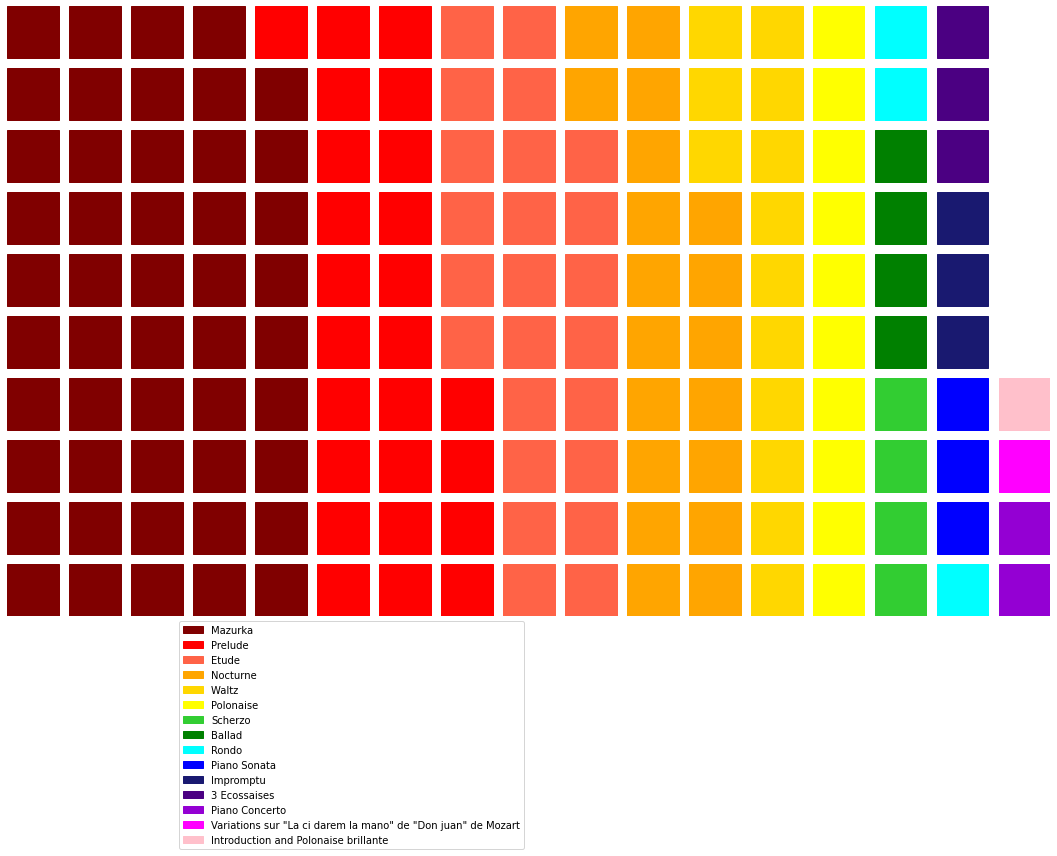

In [4]:
title_counts = defaultdict(lambda: 0)

# Counts the frequency of each type of piece within the Chopin dataset
for title in df_piano_clean['title'].values:
  title_counts[title] += 1
title_counts = sorted(title_counts.items(), key = lambda kv: kv[1], 
                      reverse = True)

# Compiles the frequencies of the 15 most popular work types into a dictionary
title_data = {
             'titles': [title_counts[0] for title_counts in title_counts[: 15]],
             'counts': [title_counts[1] for title_counts in title_counts[: 15]]
             }
df_title = pd.DataFrame(title_data)
  
# Plots the waffle chart
fig = plt.figure(
    FigureClass = Waffle,
    rows = 10,
    values = df_title.counts,
    labels = list(df_title.titles),
    figsize = (25, 12),
    legend = {'bbox_to_anchor': (0.5, 0)},
    colors = ('maroon', 'red', 'tomato', 'orange', 'gold', 'yellow', 
              'limegreen', 'green', 'cyan', 'blue', 'midnightblue', 'indigo', 
              'darkviolet', 'fuchsia', 'pink')
    )

The above visualization shows the distribution of the top 15 piece categories within the Chopin dataframe. The colors on the waffle chart correspond to a certain piece type, which is outlined on the legend below the chart. The chart highlights what kinds of pieces Chopin tended to produce and avoid, which could give insight into his artistic strengths and weaknesses.


**In a waffle chart**:

- Each box represents an equal percentage value. All of these percentage values add up to 100 percent. For instance, in a 10 x 10 waffle chart, each box represents 1%, and they all sum to 100%.
- If a certain color is prominent in the waffle chart, then the piece type that corresponds to that color in the legend accounts for a larger proportion of the piece types in the Chopin dataset.
- Conversely, if a certain color is scarce in the waffle chart, then the piece type that corresponds to that color in the legend accounts for a smaller proportion of the piece types in the Chopin dataset.
- Piece types that are more popular in the dataset are represented on the left side of the waffle chart, while those that are less popular are portrayed on the right side of the waffle chart.


**Some conclusions I can make**:
- Mazurkas, which are represented by the maroon boxes, are the most popular within the Chopin dataset.
- Piano concertos are symbolized by only 2 boxes in the waffle chart. Hence, the Kaggle dataset does not contain a lot of Chopin piano concertos.
- There seems to be an generally equal distribution of red, tomato, and orange within the waffle chart. Hence, the piece types represented by those colors (etudes, preludes, and nocturnes), seem to have equal distributions within the Chopin dataset.

#### Visualization 2: Categorical Plot - Key Signature vs. Publication Year

<Figure size 864x360 with 0 Axes>

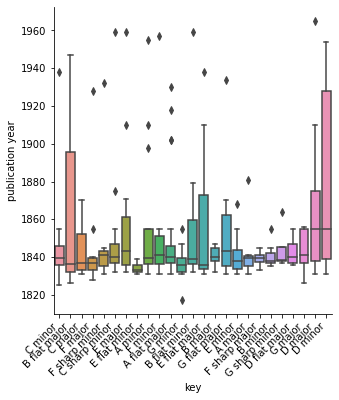

<Figure size 864x360 with 0 Axes>

In [5]:
# Create a categorical plot that presents the time periods that pieces of a
# certain key were composed
sns.catplot(
    data = df_piano, x = 'key', y = 'publication year', kind = "box", 
           dodge = False
)
plt.xticks(rotation = 45, ha = 'right')
plt.figure(figsize = (12, 5))

I also thought it would be interesting to see whether Chopin tended to create pieces with a certain key signature in specific timeframes. This categorical plot uses box and whisker plots to show the publication years in which Chopin used specific key signatures in his compositions.

**In a box and whisker plot**:
- There are five marks in each box and whisker plot. They represent the following:
 - Bottom-most mark (at the edge of the bottom whisker): **minimum**
 - Bottom edge of the box: **first quartile**
 - Within the box: **median**
 - Upper edge of the box: **third quartile**
 - Top-most mark (at the edge of the top whisker): **maximum**
- Half of the values are symbolized by the area between the mark within the box and the mark at the edge of the bottom whisker. The other half are represented between the mark within the box and the mark at the edge of the top whisker.
- The interquartile ranges for each key signature distribution are illustrated within the boxes themselves. However, values that fall below quartile 1 subtracted by 1.5 times the interquartile range or above quartile 2 plus 1.5 times the interquartile range are depicted as outliers, which are the black diamonds sprawled across the graph.


**Some conclusions I can make**:
- The median for C Major is about 1837, which suggests that Chopin tended to make his pieces in that key around that year. Furthermore, the minimum publication year value for pieces in C Major is about 1830, while the maximum is about 1870. Hence, 50% of Chopin's works in C Major were published between around 1830 and 1837, while the other 50% were published between about 1837 and 1870.
- The box and whisker plot for Chopin's C Minor pieces is very symmetric. Hence, Chopin likely composed an even amount of pieces each year in C Minor between 1822 (the minimum value of the C Minor box and whisker plot) and 1858 (the maximum value of the C Minor box and whisker plot).
- B flat major, E Major, and E flat major have right-skewed plots. The whiskers attached to the upper portion of their boxes are very long. Thus, there tends to be more right-skewing data (pieces made much later than the majority of pieces with the same key signature) for works in those keys.
- Key signatures with longer box and whisker plots such as B flat major, E flat major, and D minor indicate that Chopin used those key signatures throughout a major portion of his career. Keys with stunted box and whisker plots such as F sharp minor, E flat minor, and A major were only used in consolidated moments throughout Chopin's composition career.

## Method

### Assumptions

- I am assuming that the dataset contains a representative sample of Chopin's works. Otherwise, the cluster machine may be giving an unfair judgment of how works of specific types should be grouped together. There could be a set of Chopin tracks outside the dataset that could help the pieces be categorized differently. Furthermore, more works could give the classifier more training data that could strengthen or weaken its ability to predict the opus number of a Chopin work. Nevertheless, I am limited to the sample of Chopin works included in the dataset.
- Furthermore, I am assuming that the creator of this dataset inputted the information about Chopin's works correctly. Otherwise, the conclusions made by the classifier and cluster machines would be inaccurate.
- I am also assuming that the creator of this dataset did not purposefully change any of the original information regarding Chopin's work. If the creator did in fact alter the data, then the conclusions drawn from the machine learning algorithms used in this project would be useless.
- Additionaly, I am assuming this dataset contains enough information to fairly analyze Chopin's works. The classifier relies on a piece's title, key, composition dates, and publication year(s) to predict its opus number. The cluster machine uses a piece's opus number, key, composition dates, and publication year(s) to group pieces together. I am hoping that those features are sufficient for the machines to provide the best insight into Chopin's composition habits.
- Finally, I am hoping that Chopin felt confident that he titled his works appropriately. I am not sure whether he titled the majority of his works or if they were labeled by others. Nevertheless, considering that this project is aimed to gain deeper knowledge about Chopin's composition process, it would be unfortunate if the titles given to his works were not actually made by him. If that were the case, whether groups of the same type were categorized together by the cluster machine would not matter.

### ML methods I used

The first machine learning tool I used was the [clustering](https://neptune.ai/blog/clustering-algorithms) tool. The machine designated Chopin works that shared similar characteristics into the same category. If multiple pieces of the same type were placed in the same cluster, then Chopin's composition style was likely predictable. Someone would determine with high accuracy whether a piece of a certain type (e.g. ballad, rondo, chant) was composed by Chopin. The machine would suggest that all of Chopin's ballads sound the same with each other, all the rondos are similar to each others, etc. If the cluster machine struggled to put together pieces of the same type into the same cluster, then Chopin's composition style was likely random and less coherent. For instance, a set of ballads could be grouped into one cluster while a significant set of ballads could be grouped into another cluster. If that were the case, it might be hard for someone to determine the type of a Chopin work if they listened to it, which would indicate that Chopin tried to make his works as diverse as possible. I used dimensionality reduction analysis to aid in the clustering process by having the machine perceive all the features used to cluster the pieces (i.e. publication year, composition years, opus number, key signature) as one.

I also relied on a [random forest classifier](https://www.upgrad.com/blog/random-forest-classifier/) that predicted a piece's opus number based on its features (i.e. title, publication year, composition years, key signature). This prediction will have some degree of validity since each track is already labeled with a particular opus number. Thus, groups of pieces that have a certain opus number already exist and can be used by the algorithm as training data to predict the opus number of other works. I also used the random forest classifier to devise a feature importance graph that illustrates the features that the classifier deems the most critical in determining a piece's opus number.

I strayed from regression because the most important features for this project, a piece's type (which is suggested by its title) and opus number, are categorical. Regression, however, works best for projects that focus on quantitative features, so the method wouldn't add much breadth to my project. 

## Results

### ML Method 1: Clustering

#### One Hot Encoding

In [6]:
# Alter the composition date and key columns so that they get transformed
# from categorical data to indicator variables
df_piano_quant1 = pd.get_dummies(df_piano_clean, 
                                 columns = ['dates of composition', 'key'])
df_piano_quant1.head()

,Op.,title,publication year,dates of composition_1825,dates of composition_1826,dates of composition_1827,dates of composition_1827-1828,dates of composition_1828,dates of composition_1829,dates of composition_1829-1830,...,key_E major,key_E minor,key_F major,key_F minor,key_F sharp major,key_F sharp minor,key_G flat major,key_G major,key_G minor,key_G sharp minor
0,1,Rondo,1825.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,"Variations sur ""La ci darem la mano"" de ""Don j...",1830.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Introduction and Polonaise brillante,1831.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,Piano Sonata,1851.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Rondo à la Mazur,1828.0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [7]:
# Create a list of the quantitative features in the edited dataframe
quant_feat = list(df_piano_quant1.columns)
quant_feat.remove('title')

In [8]:
# scale normalize data
df_piano_sn = copy(df_piano_quant1)
for col in quant_feat:
  df_piano_sn[col] = df_piano_sn[col] / df_piano_sn[col].std()

In [9]:
# Display the correlation between quantitative features of a piece
df_piano_sn.loc[:, quant_feat].corr()

,Op.,publication year,dates of composition_1825,dates of composition_1826,dates of composition_1827,dates of composition_1827-1828,dates of composition_1828,dates of composition_1829,dates of composition_1829-1830,dates of composition_1830,...,key_E major,key_E minor,key_F major,key_F minor,key_F sharp major,key_F sharp minor,key_G flat major,key_G major,key_G minor,key_G sharp minor
Op.,1.000000,0.904348,-0.123291,0.144509,0.130014,-0.112511,0.003973,0.205503,-0.116104,0.085677,...,-0.026907,-0.026584,-0.099018,0.102004,-0.004067,0.013724,0.026736,0.172794,-0.020074,-0.041587
publication year,0.904348,1.000000,-0.158991,0.172720,0.183330,0.114567,0.044944,0.263850,-0.095862,0.138466,...,-0.035956,-0.011618,-0.086118,0.111820,-0.018274,-0.012161,0.040085,0.092942,-0.010963,-0.038689
dates of composition_1825,-0.123291,-0.158991,1.000000,-0.011268,-0.011268,-0.005587,-0.012634,-0.012634,-0.005587,-0.009731,...,-0.012634,-0.013880,-0.017147,-0.019976,-0.011268,-0.012634,-0.011268,-0.013880,-0.016120,-0.009731
dates of composition_1826,0.144509,0.172720,-0.011268,1.000000,-0.022727,-0.011268,-0.025482,-0.025482,-0.011268,-0.019627,...,-0.025482,-0.027995,0.138343,-0.040291,-0.022727,-0.025482,-0.022727,0.181965,-0.032513,-0.019627
dates of composition_1827,0.130014,0.183330,-0.011268,-0.022727,1.000000,-0.011268,-0.025482,-0.025482,-0.011268,-0.019627,...,-0.025482,-0.027995,-0.034586,-0.040291,-0.022727,-0.025482,-0.022727,-0.027995,-0.032513,-0.019627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
key_F sharp minor,0.013724,-0.012161,-0.012634,-0.025482,-0.025482,-0.012634,-0.028571,-0.028571,-0.012634,-0.022006,...,-0.028571,-0.031388,-0.038778,-0.045175,-0.025482,1.000000,-0.025482,-0.031388,-0.036454,-0.022006
key_G flat major,0.026736,0.040085,-0.011268,-0.022727,-0.022727,-0.011268,-0.025482,-0.025482,-0.011268,-0.019627,...,-0.025482,-0.027995,-0.034586,-0.040291,-0.022727,-0.025482,1.000000,-0.027995,-0.032513,-0.019627
key_G major,0.172794,0.092942,-0.013880,0.181965,-0.027995,-0.013880,-0.031388,-0.031388,-0.013880,-0.024175,...,-0.031388,-0.034483,-0.042601,-0.049629,-0.027995,-0.031388,-0.027995,1.000000,-0.040048,-0.024175
key_G minor,-0.020074,-0.010963,-0.016120,-0.032513,-0.032513,-0.016120,0.127589,-0.036454,-0.016120,-0.028077,...,-0.036454,-0.040048,-0.049477,-0.057639,-0.032513,-0.036454,-0.032513,-0.040048,1.000000,-0.028077


As the table shows, there are some correlations between the quantitative features in the Chopin dataframe. Hence, I thought that my clustering tool could be enhanced through dimensionality reduction (Principal Component Analysis), which would normalize the feature scale. Principal Component Analysis would remove the potentially detrimental correlations between features. Additionally, I am relying on so many quantitative features of a piece to be analyzed by the cluster tool to categorize each piece. Principal Component Analysis addresses this issue by manipulating the data so that all those features get perceived as one by the cluster machine. Henceforth, the cluster machine can group the Chopin works into categories based on one feature that represents all the quantitative features. The cluster machine would run more smoothly while still retaining the majority of the variance in the original data. An added bonus of Principal Component Analysis is that the tool would enable me to use up less memory by combining so many features into one.

#### PCA

In [10]:
# obtain values of features of interest
x = df_piano_sn.loc[:, quant_feat].values

# compress to PCA
pca = PCA(n_components = 2, whiten = True)
x_compress = pca.fit_transform(x)

# add features back into dataframe (for plotting)
df_piano_sn['pca0'] = x_compress[:, 0]
df_piano_sn['pca1'] = x_compress[:, 1]

# scatter plot the PCA data
fig = px.scatter(df_piano_sn, x = 'pca0', y = 'pca1', hover_data = ['title'],
                 title = 'Chopin piano masterpieces', color = 'title')

# exports the plot to html
fig.write_html('chopin_pca.html')

The graph shows how the Chopin data's dimensionality was reduced to two dimensions after all the quantitative features were condensed into one. Masterpieces that are deemed similar are grouped closer together on the scatterplot above.

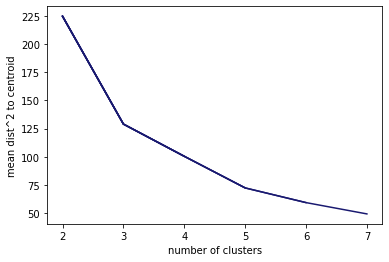

In [11]:
# keys are k (number of clusters), values are mean_d (mean distance
# from each sample to its cluster centroid)

mean_d_dict = dict()
for n_clusters in range(2, 8):
    # fit kmeans
    kmeans = KMeans(n_clusters = n_clusters)
    kmeans.fit(x_compress)
    y = kmeans.predict(x_compress)  
        
    # compute & store mean distance
    mean_d = -kmeans.score(x_compress)
    mean_d_dict[n_clusters] = mean_d

    # plot the mean distances from each sample to its cluster centroid when 
    # using 2 to 7 sub-groups
    plt.plot(list(mean_d_dict.keys()), list(mean_d_dict.values()), 
             color = 'midnightblue')
    plt.xlabel('number of clusters')
    plt.ylabel('mean dist^2 to centroid')

3 appears to be a good number of clusters for the Chopin data because the "elbow" is located on the above graph where x = 3 clusters. Having 3 clusters limits the mean distances from each sample to its centroid much more than if there were only 1 to 2 clusters. Furthermore, the decrease in mean distances from each sample to its centroid from with 3 clusters to 4 isn't too significant, so having 4 or more clusters might unnecessarily overcomplicate the clustering process.

#### Clustering

In [12]:
# keys are k (number of clusters), values are mean_d (mean distance
# from each sample to its cluster centroid)
mean_d_dict = dict()
n_clusters = 3

# fit kmeans
kmeans = KMeans(n_clusters = n_clusters)
kmeans.fit(x_compress)
y = kmeans.predict(x_compress)   
df_piano_sn['cluster'] = y

# unpack df_compress coordinates into df_piano_sn columns
df_compress = pd.DataFrame(x_compress)
df_piano_sn['compress0'] = df_compress[0]
df_piano_sn['compress1'] = df_compress[1]

# compute & store mean distance
mean_d = -kmeans.score(x_compress)
mean_d_dict[n_clusters] = mean_d

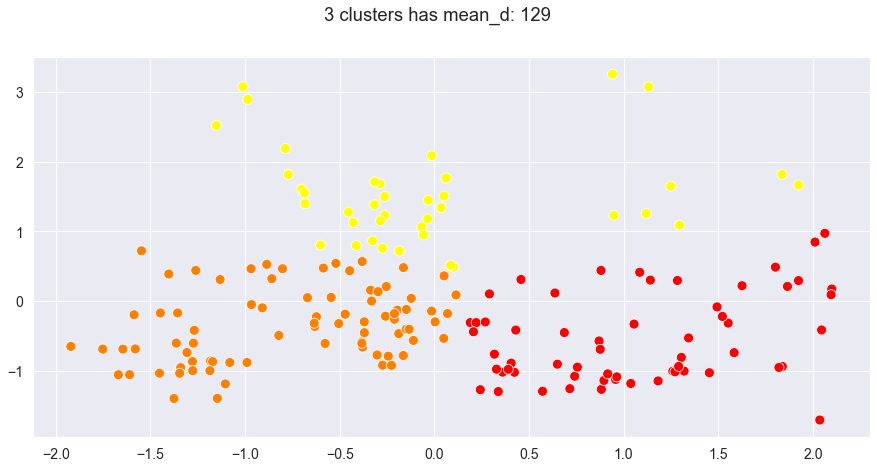

In [13]:
# plot clustering
sns.set(font_scale = 1.28)
plt.figure()
sns.scatterplot(x = x_compress[:, 0], y = x_compress[:, 1], s = 100, hue = y, 
                palette = 'autumn')
plt.suptitle(f'{n_clusters} clusters has mean_d: {mean_d:.0f}')
plt.gca().get_legend().remove()
plt.gcf().set_size_inches(15, 7)

The scatterplot shows how the cluster machine tries its best to categorize the Chopin works into 3 groups based on the quantitative data it received as input. The graph shows the clusters that the machine chose to use to fit the data in the most optimal way.

In [14]:
# Determines the positions corresponding to the centroids in the model
centroids = list(kmeans.cluster_centers_)
centroids = [tuple(coordinates) for coordinates in centroids]

/Users/jethro.ronald.lee/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning:

Glyph 12288 missing from current font.

/Users/jethro.ronald.lee/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning:

Glyph 12288 missing from current font.



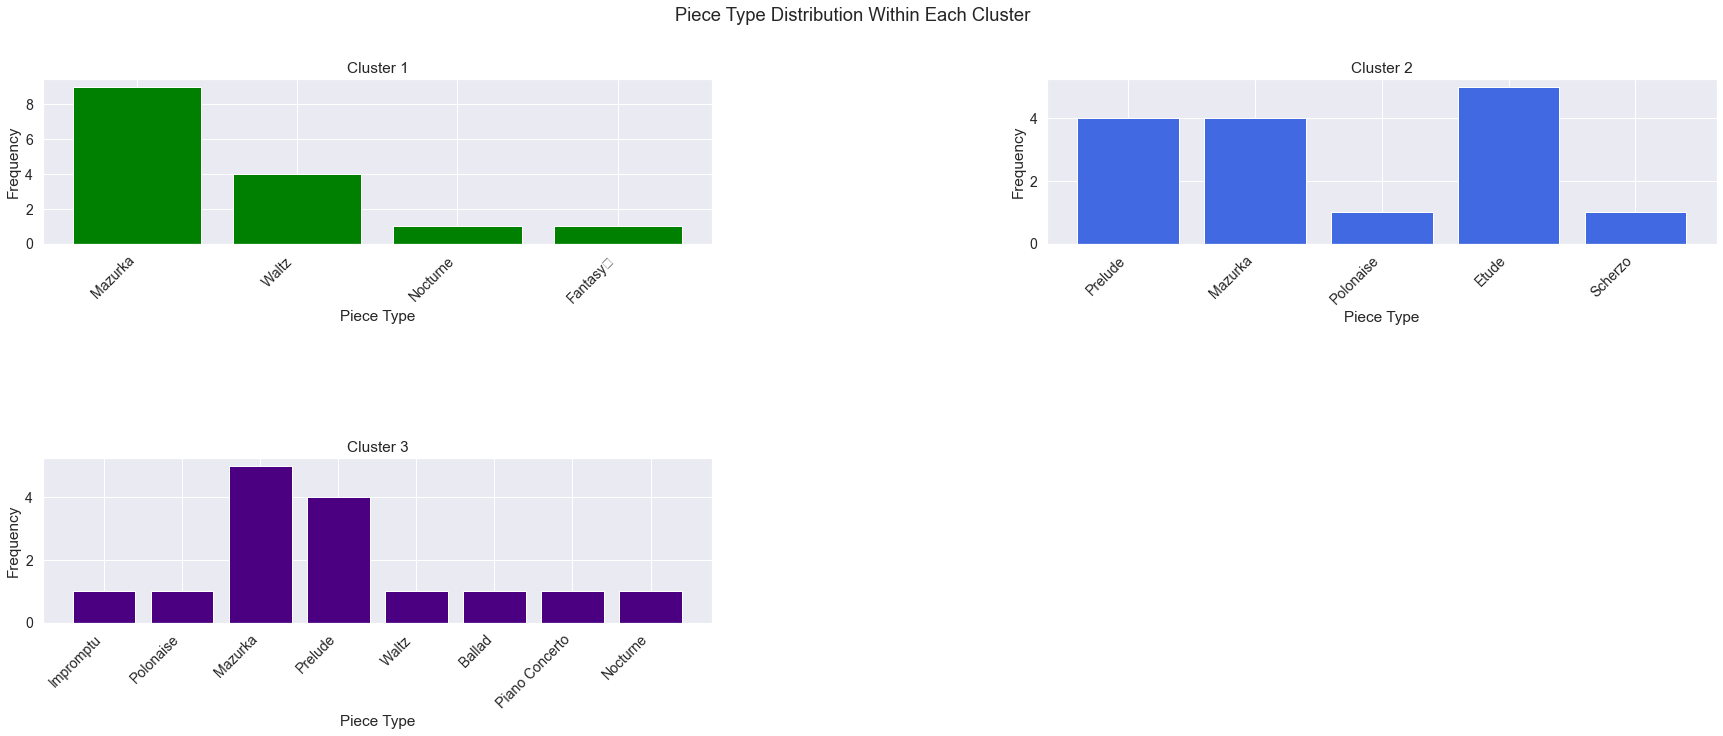

In [15]:
colors = ['green', 'royalblue', 'indigo']

for i in range(len(centroids)):

  title_counts = defaultdict(lambda: 0)

  close_pieces = {'title': [], 'publication year': [], 'distance': []}
  close_pieces = pd.DataFrame(close_pieces)
  min_dist_to_centroid = float('inf')

  # Calculates the distance between a point representing a piece and a centroid
  for idx, row in df_piano_sn.iterrows():
    dist_to_centroid = distance.euclidean(row['compress0':'compress1'],
                                          centroids[i])
    new_row = {'title': [row['title']], 'distance': [dist_to_centroid]}
    new_row = pd.DataFrame.from_dict(new_row)
    close_pieces = pd.concat([close_pieces, new_row], ignore_index = True)

  # Sort the pieces into a dataframe based on their distance to a centroid
  close_pieces = close_pieces.sort_values(by = 'distance')
  close_pieces = close_pieces[: 15]

  # Count how much of a particular piece type is contained among the 15
  # works closest to a centroid
  for title in list(close_pieces['title']):
    title_counts[title] += 1
  titles = list(title_counts.keys())
  counts = list(title_counts.values())
  
  # Plot the piece type frequencies among the 15 compositions closest to a
  # centroid for each cluster as bar charts
  plt.subplot(2, 2, i + 1)
  plt.bar(titles, counts, color = colors[i])
  plt.xlabel('Piece Type')
  plt.ylabel('Frequency')
  plt.xticks(rotation = 45, horizontalalignment = 'right')

  # Each subplot is labeled based on the cluster it represents
  plt.gca().title.set_text('Cluster ' + str(i + 1))

# Provides an overarching title above the 3 subplots
plt.suptitle('Piece Type Distribution Within Each Cluster')

# Resizes the figure and adjusts the spacing between graphs for clarity
plt.gcf().set_size_inches(30, 10)
plt.subplots_adjust(wspace = .5, hspace = 1.3)

These bar charts represent the clusters and the piece types they contain. Each chart signifies a different cluster. Piece types with longer bars are more present within a certain cluster. Piece types with shorter bars are less present within the cluster. The labels on the x-axis of each bar chart are the piece types found among the 15 works closest to the centroid of the cluster represented by the graph they are in.

### ML Method 2: Random Forest Classification (Predicting the Type of a Chopin Track)

#### Random Forest Classifier

##### One Hot Encoding

In [16]:
# Alter the title, composition date, and key columns so that they get 
# transformed from categorical data to indicator variables
df_piano_quant2 = pd.get_dummies(df_piano_clean, columns = ['title',
                                                            'dates of composition', 
                                                            'key'])
df_piano_quant2.head()

,Op.,publication year,title_17 Chants Polonais,title_3 Ecossaises,title_Allegro de concert,title_Andante spianato et Grande Polonaise brillante,title_Ballad,title_Barcarolle,title_Berceuse,title_Bolero,...,key_E major,key_E minor,key_F major,key_F minor,key_F sharp major,key_F sharp minor,key_G flat major,key_G major,key_G minor,key_G sharp minor
0,1,1825.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1830.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1831.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1851.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1828.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [17]:
# Create a list of the quantitative features in the edited dataframe
quant_feat = list(df_piano_quant2.columns)
quant_feat.remove('Op.')

In [18]:
n_splits = 10

# define the true and testing values
y_feat = 'Op.'
x = df_piano_quant2.loc[:, quant_feat].values
y = df_piano_quant2.loc[:, y_feat].values

# initialize a random forest classifier
rf_clf = RandomForestClassifier()

# Cross-validation:
# initialize a k fold
skfold = StratifiedKFold(n_splits = n_splits, shuffle = True)

# initialize y_pred, stores predictions of y
y_pred = np.empty_like(y)

for train_idx, test_idx in skfold.split(x, y):
    # get training data
    x_train = x[train_idx, :]
    y_train = y[train_idx]
    
    # get test data    
    x_test = x[test_idx, :]
    
    # fit data
    rf_clf = rf_clf.fit(x_train, y_train)
    
    # estimate on test data
    y_pred[test_idx] = rf_clf.predict(x_test)

/Users/jethro.ronald.lee/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=10.



##### Confusion Matrix

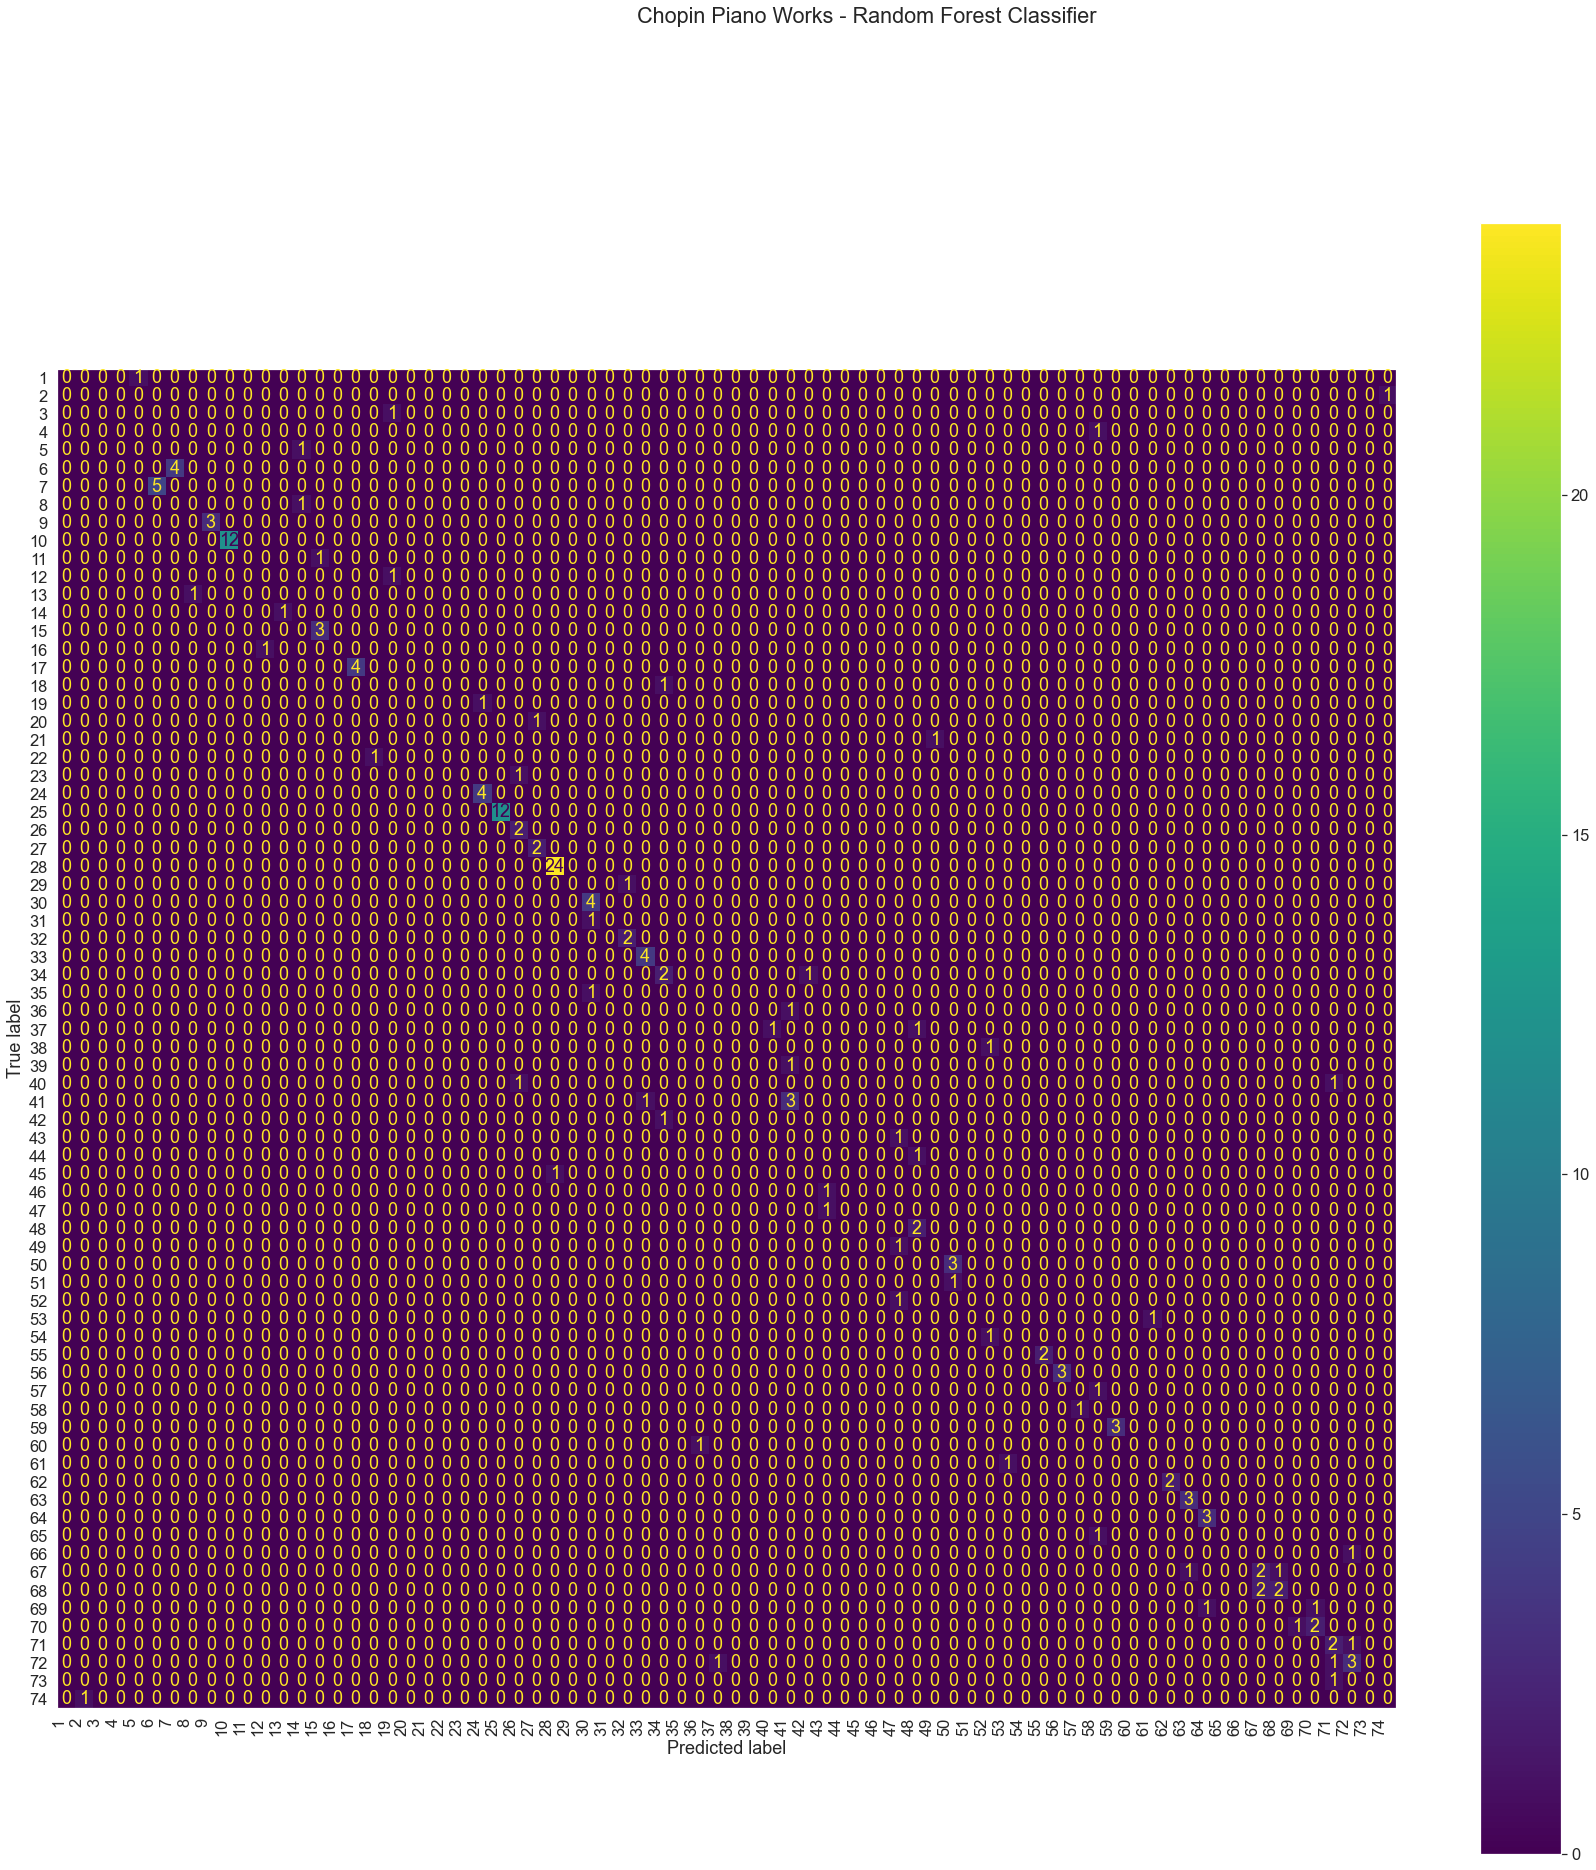

In [19]:
# obtain and plot the confusion matrix
# build the confusion matrix
y_true = y
conf_mat = confusion_matrix(y_true = y_true, y_pred = y_pred)
conf_mat_disp = \
    ConfusionMatrixDisplay(conf_mat, display_labels = np.unique(y_true))

# plots confusion matrix for the random forest classifier for df_piano_quant2
sns.set(font_scale=1.5)
conf_mat_disp.plot()
plt.suptitle('Chopin Piano Works - Random Forest Classifier')
plt.xticks(rotation = 90, horizontalalignment = 'right')
plt.gcf().set_size_inches(30, 30)
plt.grid(False)

This graph is a confusion matrix for the random forest classifier. It visualizes the accuracy in which the random forest classifier predicted a work's opus number. The matrix gives insight into how well the classifier could correctly classify a work's opus number as well as the opus number that works of a certain opus tend to get mistakenly classified with. Boxes contained in the diagonal with shades on the upper portion of the color map to the right demonstrate that the classifier had better success at predicting the opus number of pieces whose number aligns with that box in the matrix.

For instance:
  - The classifier predicted pieces with an opus number of 28 with the best accuracy
  - It commonly misclassified pieces with an opus number of 7 with an opus number of 6
  - Pieces with opus numbers of 10 and 25 were each classified correctly with the similar levels of accuracy

##### Classifier's Accuracy Score

In [20]:
# calculate accuracy score of classifier
accuracy_score(y_true, y_pred)

0.6277777777777778

### Feature Importance Graph

In [21]:
def plot_feat_import_rf_clf(feat_list, feat_import, sort = True, limit = None):
    """ plots feature importances in a horizontal bar chart
    
    The x axis is labeled accordingly for a random forest classifier
    
    Args:
        feat_list (list): str names of features
        feat_import (np.array): feature importances (mean gini reduce)
        sort (bool): if True, sorts features in decreasing importance
            from top to bottom of plot
        limit (int): if passed, limits the number of features shown
            to this value    
    """

    if sort:
        # sort features in decreasing importance
        idx = np.argsort(feat_import).astype(int)
        feat_list = [feat_list[_idx] for _idx in idx]
        feat_list = np.flip(feat_list)
        feat_import = feat_import[idx] 
        feat_import = np.flip(feat_import)
        
    if limit is not None:
        # limit to the first limit feature
        feat_list = feat_list[:limit]
        feat_import = feat_import[:limit]
    
    # plot and label feature importance
    plt.barh(feat_list, feat_import)
    plt.gcf().set_size_inches(5, len(feat_list) / 2)
    plt.xlabel('Feature importance\n(Mean decrease in Gini across all Decision Trees)')

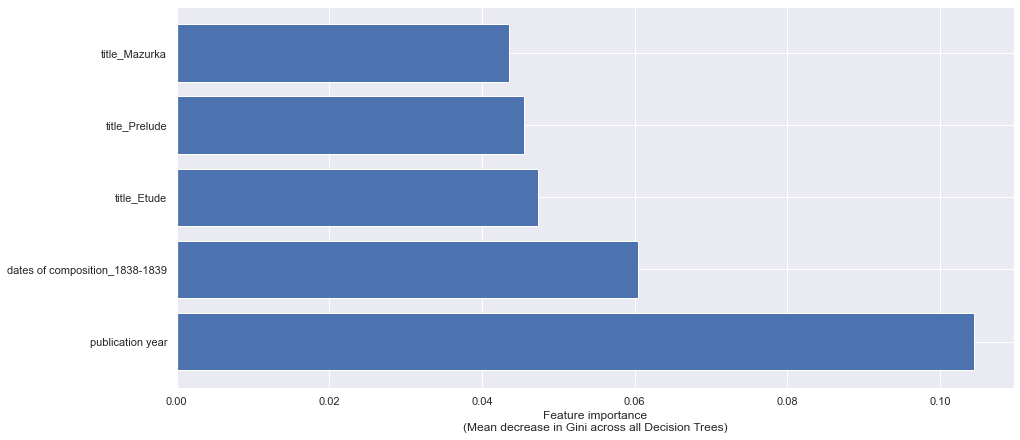

In [22]:
import numpy as np
import seaborn as sns

sns.set()

# plots the importance of features in determining a piece's opus number by the 
# random forest classifier
plot_feat_import_rf_clf(quant_feat, rf_clf.feature_importances_, limit = 5)
plt.gcf().set_size_inches(15, 7)

This graph displays how critical a feature is in helping the random forest classifier to determine a piece's opus number. A feature associated with a longer bar is more important in determining the opus number of a piece than features associated with shorter bars (in this case, the graph shows that a piece's publication year is the most crucial feature in determining a work's opus number). However, from the feature importance graph alone, one cannot determine whether an increase or decrease in the feature with the longest bar is associated with a higher or lower probability that the piece has a particular opus number. For instance, perhaps only certain ranges of publication years are associated with pieces of a certain opus.

### Interpretation

The [PCA graph](#PCA) presents that pieces of various types overlap a lot. The machine thought that Chopin pieces of the same type tended to have similar features. Due to the amount of overlap across piece types, it would make sense for my cluster machine to have a hard time creating categories that resemble those made by Chopin for his works through the piece's titles.

As I anticipated, the [cluster machine](#Clustering) had a difficult time grouping the Chopin data into natural clusters. Hence, clustering does not seem optimal with the dataset I used for my project. The bar charts show how much diversity is contained within each cluster. While it's true that some clusters contain pieces with a type unique to its own group (e.g. only cluster 1 contains fantasies, and only cluster 3 contains impromptus), many piece types were popular across clusters. The bar charts display the distribution of piece types among the 15 works of which have points on the cluster graph that are the closest to a centroid. Mazurkas are prominent in all the clusters, while preludes are popular in clusters 2 and 3, and waltzes are dominant in clusters 1 and 3, for example. The fact that pieces of the same type can be found in multiple clusters suggests that Chopin does not employ the same composition style across works of a certain type. All of his mazurkas, for instance, probably sound distinct from each other and are characterized by their own stories. This finding suggests that Chopin executed impressive creativity throughout his career by ensuring that pieces of a certain type did not sound the same with each other. Every waltz he released, for instance, could have generated surprise among audiences who expected him to produce a waltz similar to his previous ones.

With the [random forest classifier](#Random-Forest-Classifier), the diagonal of its [confusion matrix](#Confusion-Matrix) represents the ability of the classifier to correctly assign an opus number to pieces of a particular opus. The diagonal was only bright at some areas. While it's true that the accuracy score of the classifier is about 65%, closer inspection of the machine's confusion matrix reveals that the classifier displayed a strong ability to avoid incorrectly labeling pieces of a certain opus while having a poor ability to correctly assign a number to works of a specific opus. In other words, a lot of the boxes outside the diagonal of the confusion matrix have values of 0 while the diagonal itself is not very bright. Nevertheless, the classifier still impressively could classify pieces with an opus number of 10, 25, and 28 relatively well. With the exception of works in those opuses, the classifier struggled immensely to identify the opus that a composition belonged to. This result further supports that Chopin's style was varied and not predictable. Hence, people likely cannot use the characteristics of a Chopin work to easily identify its opus. Chopin likely made pieces of a certain opus so beautifully distinct with each other that one would fail to compile a list of features that define works in that opus. Still, out of interest I observed [which features were most important](#Feature-Importance-Graph) in enabling the random forest classifier to predict a piece's opus number. The feature importance graph reveals that the publication year, whether the piece is a etude, and whether the piece was made between 1838 and 1839 yielded the greatest mean decrease in gini across all the classifier's decision trees, indicating that these features were the most important for the machine.

Overall, the results prove that discerning the type of a Chopin work is difficult. Perhaps one could argue that the classifier had some success with a relatively high accuracy score and mastery at not mistaking a piece with an incorrect opus number. Nevertheless, the clustering does not align with the titles given to Chopin's works. Perhaps there are many similarities across works that do not belong to the same type. Or maybe this result suggests that Chopin titled his pieces inappropriately. Nevertheless, experts in the field of music concur that music is too multidimensional to be defined by standards. Genre, artistry, liveliness, and other features that people use to judge a song are too subjective to be associated with one value. Likewise, perhaps the clustering results further prove that works cannot be easily grouped into categories, even if they yield titles that suggest how the composers of those songs would group them.

The results open up to a myriad of possibilities. Maybe Chopin should have titled his works differently. Or maybe Chopin made his works with such innovativeness that they all sound too different for the cluster machine to appropriately group into categories. Perhaps Chopin used too many different titles to classify his works and should have instead categorized them based on the clusters made by my machine. As the PCA graph provides, there is a bunch of overlap between pieces of the same type.

Nevertheless, these results should not be accepted at face value. I don't think the dataset encompasses enough features of a Chopin work for the classifier and cluster machines to perform optimally. Many pieces of the same type happen to have the same key signatures, publication dates, and composition years. The features contained in the dataset don't contain much information about the music within each piece itself: the tempo, liveliness, acousticness, loudness, valence, and other sonic features are not outlined within the dataset. My project would definitely provide more conclusive results if some of those kinds of features were explored by my algorithms.

### Future Analysis

In the future, I would definitely want to analyze more Chopin works to gain clearer insight into his composition style. I think this consideration is justifiable because, as with any study, more data provides stronger results. I was limited by the data contained in the Kaggle dataset. Even though the Kaggle dataset contained a substantial number of pieces across a wide timeframe, I still think it would be better to investigate as many Chopin pieces as possible to fairly judge his composition style. Maybe additional pieces would provide the cluster machine more data to categorize the pieces in a way that matches how Chopin titled his works. Alternatively, incorporating more pieces could task the cluster tool with pieces of a new kind of class that would need to be properly clustered. As for the classifier, more pieces would give it more training data that could allow it predict a piece's opus number with higher or lower accuracy. Furthermore, the features used to determine a piece's opus number could be different from the features most critical for the current random forest classifier. There aren't many ethical implications with this kind of analysis, but I would definitely need to make sure I'm obtaining information from reliable sources. I don't want corrupt data to ruin the validity of my results since I feel like they would be useful for those who also want to better appreciate Chopin's artistry. Unlike with pop artists, most classical artists are deceased and not continuing to craft pieces. Hence, obtaining all of Chopin's works to analyze is possible, although probably difficult considering that some of his pieces are not even released to the public or maybe even undiscovered. 

Furthermore, it would be interesting to employ this kind of investigation with more artists. Chopin is definitely not representative of all classical artists. Furthermore, I want to compare the composition techniques of artists across various genres and time periods. Today, I feel like many pop artists have a periodical approach when composing in which they release tracks that share a common theme within one album at a specific moment in time. The project suggests that Chopin instead treated his audience with unique works at random points in time. I wonder if this style of composition is popular among classical artists like Chopin. It would be even more interesting investigating whether some artists today have composition techniques that resemble those of the past. Scrutinizing the similarities and differences across composers from all walks of life could help me better appreciate how the music industry has evolved and the uniqueness exhibited by classical composers that make me hold their compositions in a special place in my heart. In terms of ethical implications, I should make sure not to dismiss artists of a particular type. Artists of all races, genres, ages, genders, sexual orientations, and more should be considered in this study. Otherwise, my project would not be applicable to everyone on this planet. We all have unique music tastes that derive from a multitude of artists of various backgrounds. I would like to represent the diversity within the music industry as best as possible with my project, so I think this course of action is very justifiable.

Finally, I would love it if I could access a Chopin dataset that provides details about more features about Chopin's works. These kinds of qualities include the time signature, length, tempo, and even maybe more subjective ones such as liveliness, valence, and danceability. As I mentioned, the number of characteristics included in the Kaggle dataset were probably insufficient in helping the classifier and cluster machines to perform in the best way possible. Including the additional features into my algorithms could produce entirely different results that change my perspective about Chopin's composition techniques. As for ethical implications, I would need to make sure I can obtain this sort of data legally, considering the many copyright laws that protect a work from public access. Yet, I think this action is very justifiable because so much about a song can be identified through characteristics not in the Kaggle dataset. For instance, many waltzes are in the 3/4 time signature. If time signature was a feature included in the Kaggle dataset, perhaps the cluster machine would have grouped more Chopin waltzes together. Additionally, many scherzos share upbeat tempos since they are supposed to resemble a peppy dance. The cluster machine could exhibit a greater ability to cluster scherzos together with information on this quality alone across Chopin's masterpieces.